In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, binom, poisson, expon, norm


In [3]:
#path to data
data_path = "C:\\Users\\Luís Pinto Coelho\\Desktop\\Análise e visualização de dados complexos agro-ambientais\\exercices\\ex_3\\EFIplus_medit.csv"


In [4]:
# Load data, checking for separator issues
df = pd.read_csv(data_path, sep=';', engine='python')

# I encountered some errors that i need to solve with the lines of code below: 

# -> Column "catchment" not found → The column name may be different in the CSV, so we check for possible variations. 
# -> Column "temp_ann" not found → The column name might have a different format, so we look for alternatives.
# -> Incorrect CSV separator → The file may be separated by ;, so we set sep=';' in read_csv.
# -> Extra spaces in column names → We remove unnecessary spaces to avoid errors when accessing columns.

In [5]:
# Clean column names to remove extra spaces
df.columns = df.columns.str.strip()

In [6]:
# Print available columns to check for errors
print("Available columns:", df.columns.tolist())

Available columns: ['Site_code', 'Latitude', 'Longitude', 'Country', 'Catchment_name', 'Galiza', 'Subsample', 'Calib_EFI_Medit', 'Calib_connect', 'Calib_hydrol', 'Calib_morphol', 'Calib_wqual', 'Geomorph1', 'Geomorph2', 'Geomorph3', 'Water_source_type', 'Flow_regime', 'Altitude', 'Geological_typology', 'Actual_river_slope', 'Natural_sediment', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul', 'Barriers_catchment_down', 'Barriers_river_segment_up', 'Barriers_river_segment_down', 'Barriers_number_river_segment_up', 'Barriers_number_river_segment_down', 'Barriers_distance_river_segment_up', 'Barriers_distance_river_segment_down', 'Impoundment', 'Hydropeaking', 'Water_abstraction', 'Hydro_mod', 'Temperature_impact', 'Velocity_increase', 'Reservoir_flushing', 'Sedimentation', 'Channelisation', 'Cross_sec', 'Instream_habitat', 'Riparian_vegetation', 'Embankment', 'Floodprotection', 'Floodplain', 'Toxic_substances', 'Acidification', 'Water_quality_index', 'Eutrophi

In [7]:
# Attempt to infer the correct column name for catchment
expected_catchment_names = ["Catchment_name", "catchment", "Catchment", "Basin", "River_Catchment"]
catchment_col = None
for col in df.columns:
    if col in expected_catchment_names:
        catchment_col = col
        break

In [8]:
# Attempt to infer the correct column name for temperature
temp_col_candidates = ["temp_ann", "Temperature_Annual", "Annual_Temp", "Mean_Annual_Temperature"]
temp_col = None
for col in df.columns:
    if col in temp_col_candidates:
        temp_col = col
        break


In [9]:
# Raise error if columns were not found
if catchment_col is None:
    raise KeyError(f"Catchment column not found. Available columns: {df.columns.tolist()}")
if temp_col is None:
    raise KeyError(f"Temperature column not found. Available columns: {df.columns.tolist()}")

print(f"Using '{catchment_col}' as the catchment column.")
print(f"Using '{temp_col}' as the temperature column.")


Using 'Catchment_name' as the catchment column.
Using 'temp_ann' as the temperature column.


In [10]:
# Find the 4 catchments with the most sampling sites
top_catchments = df[catchment_col].value_counts().nlargest(4).index
df_top = df[df[catchment_col].isin(top_catchments)]

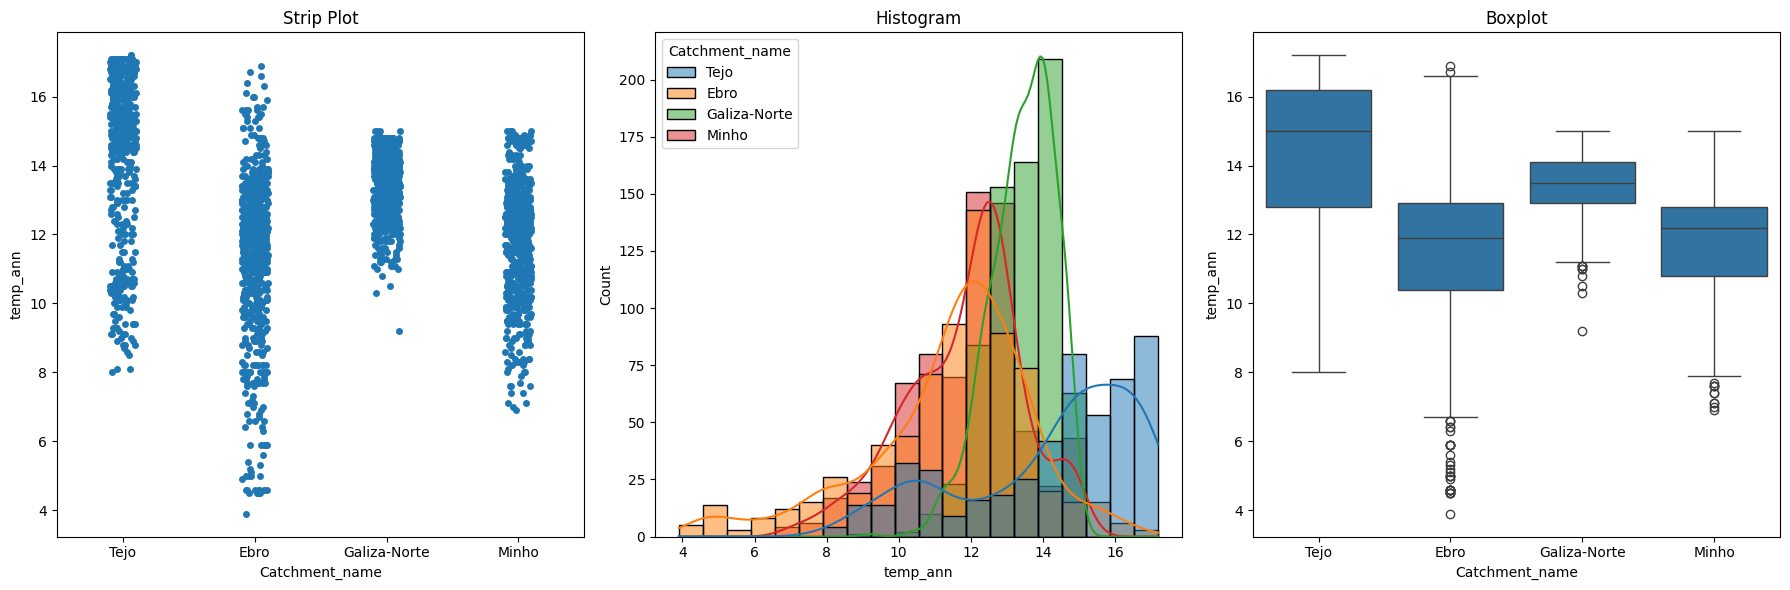

In [11]:
# Strip plot, histogram, and boxplot for the 4 catchments
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.stripplot(x=catchment_col, y=temp_col, data=df_top, ax=axes[0], jitter=True)
axes[0].set_title("Strip Plot")

sns.histplot(data=df_top, x=temp_col, hue=catchment_col, kde=True, ax=axes[1], bins=20)
axes[1].set_title("Histogram")

sns.boxplot(x=catchment_col, y=temp_col, data=df_top, ax=axes[2])
axes[2].set_title("Boxplot")

plt.tight_layout()
plt.show()

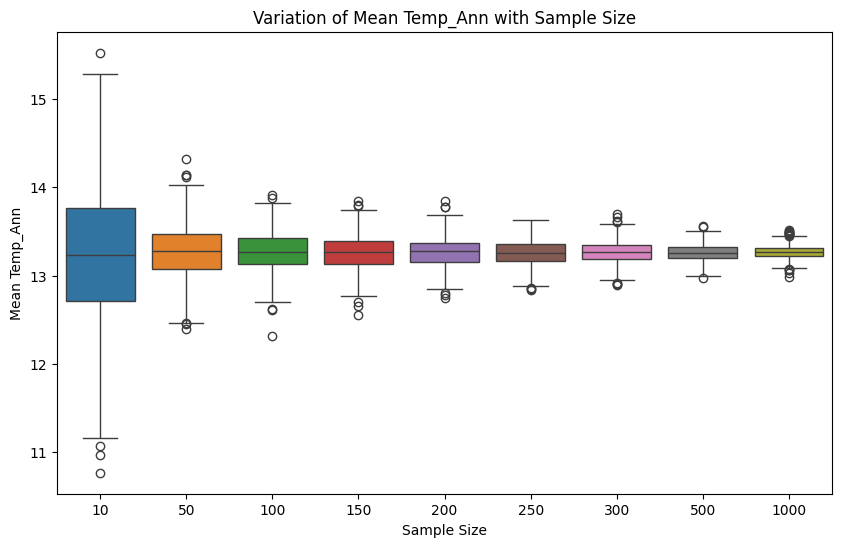

In [12]:
# Sampling simulation to check mean convergence
sample_sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
n_samples = 1000
means = {size: [] for size in sample_sizes}

for size in sample_sizes:
    for _ in range(n_samples):
        sample = df[temp_col].sample(n=size, replace=True)
        means[size].append(sample.mean())

mean_df = pd.DataFrame(means)

plt.figure(figsize=(10, 6))
sns.boxplot(data=mean_df)
plt.xlabel("Sample Size")
plt.ylabel("Mean Temp_Ann")
plt.title("Variation of Mean Temp_Ann with Sample Size")
plt.show()

In [13]:
# Statistical Distributions
sns.set_theme(color_codes=True)
sns.set_theme(rc={'figure.figsize':(10,6)})
sns.set_theme(style='white')

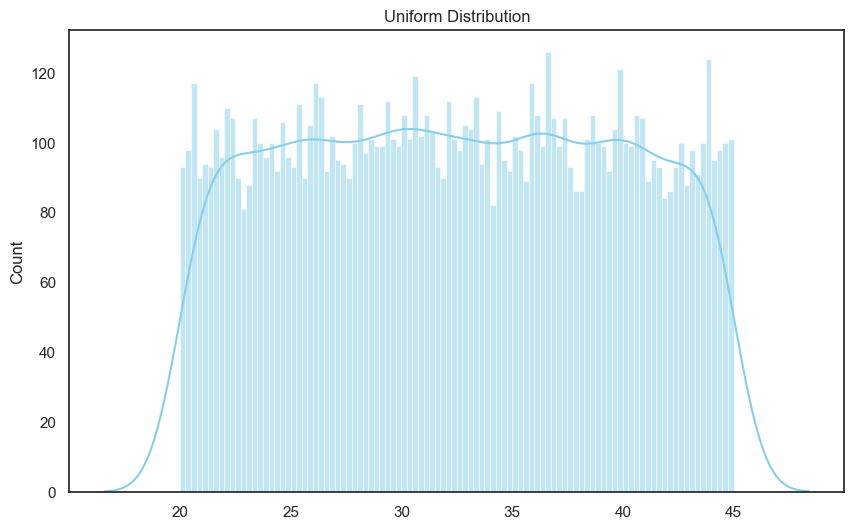

In [14]:
# Uniform Distribution
number = 10000
start, width = 20, 25
uniform_data = uniform.rvs(size=number, loc=start, scale=width)
sns.histplot(uniform_data, bins=100, color='skyblue', kde=True, kde_kws=dict(cut=3))
plt.title("Uniform Distribution")
plt.show()

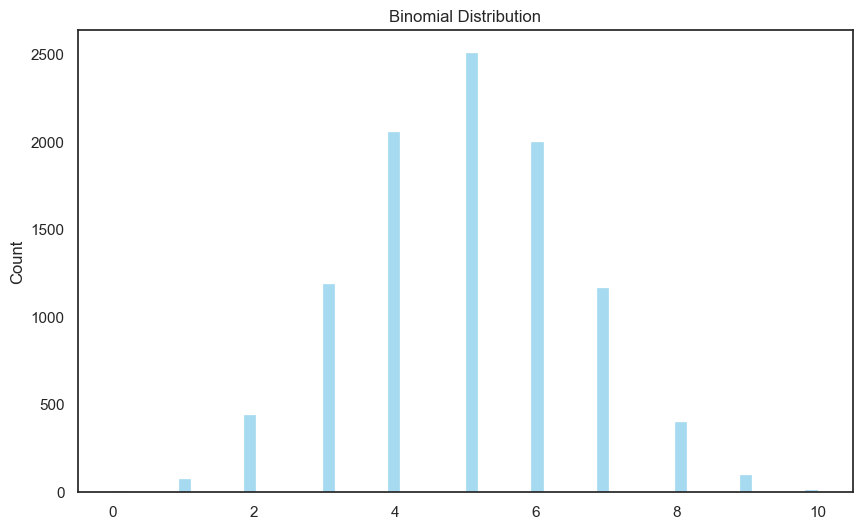

In [15]:
# Binomial Distribution
binom_data = binom.rvs(n=10, p=0.5, size=10000)
sns.histplot(binom_data, color='skyblue')
plt.title("Binomial Distribution")
plt.show()

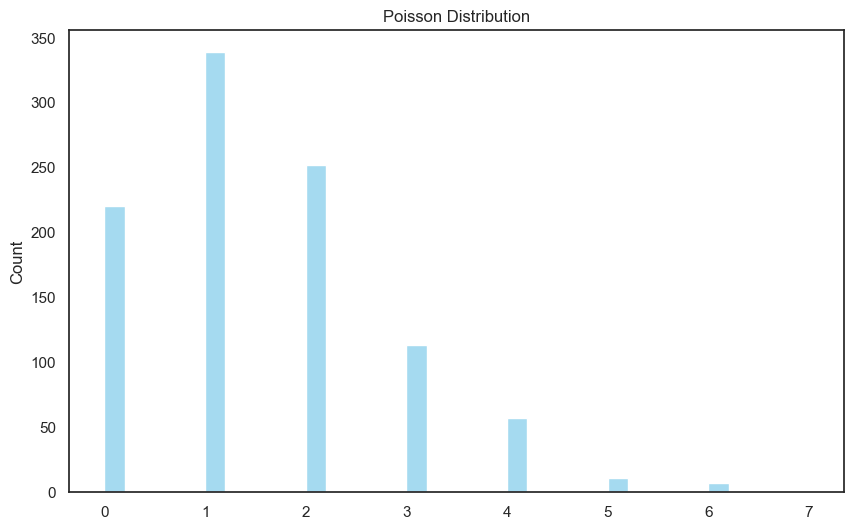

In [16]:
# Poisson Distribution
poisson_data = poisson.rvs(1.5, size=1000)
sns.histplot(poisson_data, color='skyblue')
plt.title("Poisson Distribution")
plt.show()

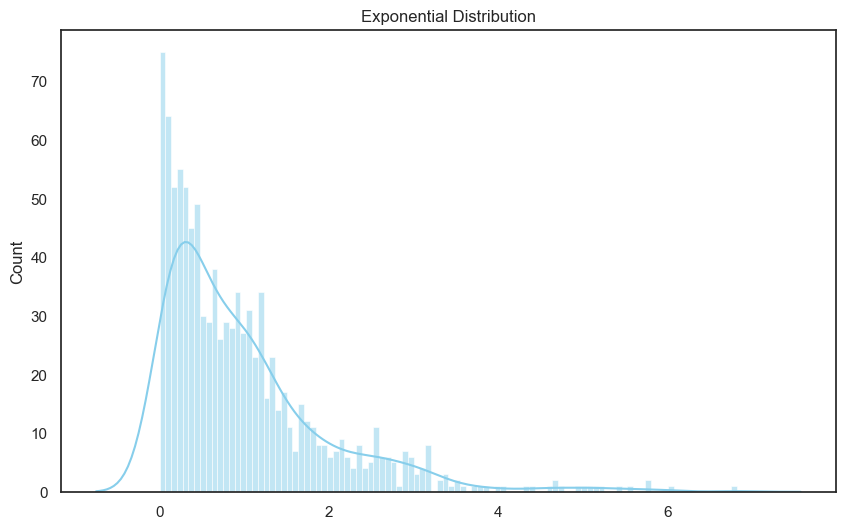

In [17]:
# Exponential Distribution
expon_data = expon.rvs(scale=1, loc=0, size=1000)
sns.histplot(expon_data, bins=100, kde=True, color='skyblue', kde_kws=dict(cut=3))
plt.title("Exponential Distribution")
plt.show()

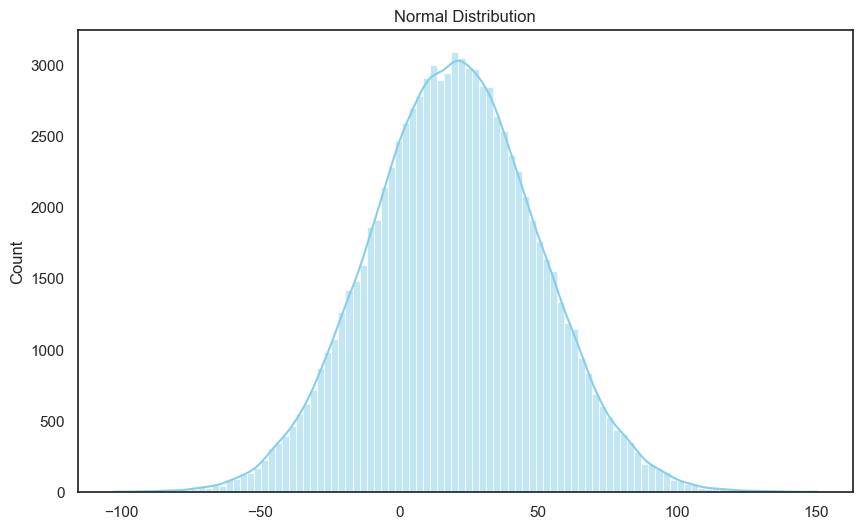

In [18]:
# Normal Distribution
normal_data = norm.rvs(size=90000, loc=20, scale=30)
sns.histplot(normal_data, bins=100, kde=True, color='skyblue')
plt.title("Normal Distribution")
plt.show()
